In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets  import imdb
from tensorflow.keras import models, layers, optimizers

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(train_data,train_label),(test_data, test_label) = imdb.load_data(num_words=10000)

In [5]:
train_data.shape

(25000,)

In [6]:
train_label.shape

(25000,)

In [7]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
word_index = imdb.get_word_index()

In [9]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [10]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [11]:
decoded_review = ' '.join(reverse_word_index.get(i - 3, '.') for i in train_data[0])

In [12]:
print(decoded_review)

. this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert . is an amazing actor and now the same being director . father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for . and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also . to the two little boy's that played the . of norman and paul they were just brilliant children are often left out of the . list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [13]:
def sequence_vectorize(sequences, dimension=10000):
    result = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        result[i,sequence] = 1.
    return result    

In [20]:
x_train_data = sequence_vectorize(train_data)
y_test_data = sequence_vectorize(test_data)

In [21]:
type(y_test_data)

numpy.ndarray

In [39]:
x_train_data = np.asarray(x_train_data).astype('float32')
y_test_data = np.asarray(y_test_data).astype('float32')

In [41]:
x_train_data

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], dtype=float32)

In [42]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [43]:
train_data.shape

(25000,)

In [55]:
x_val = x_train_data[:10000]        #hand out cross validation
partial_x_train = x_train_data[10000:]
y_val = train_label[:10000]
partial_y_val = train_label[10000:]

In [56]:
x_val.shape

(10000, 10000)

In [57]:
partial_x_train.shape

(15000, 10000)

In [58]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [63]:
history = model.fit(partial_x_train,partial_y_val,epochs=4,batch_size=512,validation_data=(x_val,y_val))
                                                          #no. of epochs because accuracy is not increasing afterwards
    

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 1s 98us/sample - loss: 0.0069 - acc: 0.9989 - val_loss: 0.7216 - val_acc: 0.8655
Epoch 2/4
15000/15000 [==============================] - 1s 85us/sample - loss: 0.0027 - acc: 0.9999 - val_loss: 0.7806 - val_acc: 0.8587
Epoch 3/4
15000/15000 [==============================] - 1s 85us/sample - loss: 0.0038 - acc: 0.9996 - val_loss: 0.7919 - val_acc: 0.8638
Epoch 4/4
15000/15000 [==============================] - 1s 87us/sample - loss: 0.0016 - acc: 0.9999 - val_loss: 0.8576 - val_acc: 0.8584


In [60]:
history_dictionay = history.history
print(history_dictionay)

{'loss': [0.5271131059646607, 0.3129516585191091, 0.2310574356396993, 0.1798410307566325, 0.1493755187789599, 0.12349027481079101, 0.10250352538426717, 0.0840452334245046, 0.07065292730331421, 0.06000736416180929, 0.04820471440553665, 0.03842096751133601, 0.03160470378299554, 0.026637336867054304, 0.019484098979830743, 0.017073473561306795, 0.013625900188585123, 0.008584967238704364, 0.009862237155064941, 0.004560391777878006], 'acc': [0.79006666, 0.9026, 0.92653334, 0.9426, 0.95233333, 0.964, 0.9698, 0.9759333, 0.98113334, 0.98413336, 0.9888, 0.9913333, 0.9935333, 0.9949333, 0.9976, 0.997, 0.99813336, 0.9993333, 0.9986, 0.9998], 'val_loss': [0.39159425215721133, 0.3153324468612671, 0.28075842370986936, 0.2871820285797119, 0.2785346811771393, 0.2913039592266083, 0.32713488273620606, 0.3647467816352844, 0.36075509815216067, 0.3699028025150299, 0.3949771618366241, 0.4765015730381012, 0.4928666747570038, 0.48253443565368653, 0.5360339888572693, 0.5515147903442382, 0.5867379651546478, 0.64

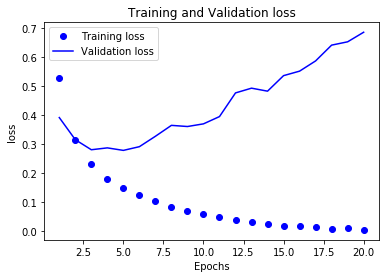

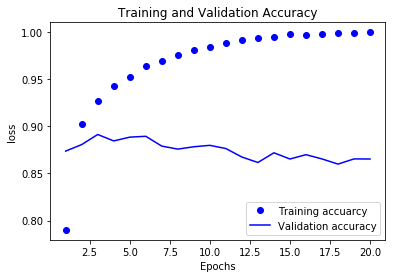

In [61]:
training_loss = history_dictionay['loss']
val_loss = history_dictionay['val_loss']
epochs = range(1,len(val_loss)+1)
plt.plot(epochs,training_loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()
plt.clf()
training_acc = history_dictionay['acc']
val_acc = history_dictionay['val_acc']
epochs = range(1,len(val_acc)+1)
plt.plot(epochs,training_acc,'bo',label = 'Training accuarcy')
plt.plot(epochs,val_acc,'b',label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [65]:
model.predict(y_test_data)

array([[1.0078251e-03],
       [1.0000000e+00],
       [9.7895360e-01],
       ...,
       [5.0902367e-04],
       [1.3596416e-03],
       [2.1063656e-01]], dtype=float32)